In [1]:
#pip install opencv-python
import sys
import os
os.sys.path
import cv2
import numpy as np


from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#Tensorflow keras for CNN model
#pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
folder_dir = "flowers"

label=[]
data=[]

SIZE = 128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir,folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir,folder,file))
            img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # converts
            im = cv2.resize(img_rgb,(SIZE,SIZE))
            data.append(im)
        else:
            continue
 


In [3]:
data_array = np.array(data)
label_array = np.array(label)

In [4]:

#print(label_arr)

encoder =LabelEncoder()
y = encoder.fit_transform(label)

#print(y)
y =  to_categorical(y,5) # 5 flower type -converts all 5 into categorical
#print(y)
#x = data_arr/255
#x =[]
#for im in data:
 #   x.append(cv2.normalize(im, None, 0, 255,cv2.NORM_MINMAX, dtype=cv2.CV_32F))
x = data_array/255


In [5]:
print(np.shape(y))
print(np.shape(data))

(4317, 5)
(4317, 128, 128, 3)


In [6]:
#show normalized image
cv2.imshow('k',x[0])
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [7]:
X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size=0.20, random_state=10)

In [8]:
print(len(X_train))
print(len(Y_train))

3453
3453


In [9]:
model = Sequential()
#input
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#hidden
model.add(Conv2D(filters = 128, kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(Conv2D(filters = 128, kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(Conv2D(filters = 128, kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#output
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [10]:

datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [11]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,Y_test),
                              verbose = 1)

C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\krish\AppData\Local\Temp\ipykernel_5196\154296598.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


Epoch 1/64
108/108 [==============================] - 24s 108ms/step - loss: 1.4645 - accuracy: 0.3406 - val_loss: 1.2263 - val_accuracy: 0.4560
Epoch 2/64
108/108 [==============================] - 10s 87ms/step - loss: 1.3319 - accuracy: 0.4214 - val_loss: 1.2137 - val_accuracy: 0.4942
Epoch 3/64
108/108 [==============================] - 9s 87ms/step - loss: 1.2706 - accuracy: 0.4477 - val_loss: 1.1842 - val_accuracy: 0.4977
Epoch 4/64
108/108 [==============================] - 10s 88ms/step - loss: 1.2130 - accuracy: 0.4723 - val_loss: 1.1458 - val_accuracy: 0.5231
Epoch 5/64
108/108 [==============================] - 9s 86ms/step - loss: 1.1678 - accuracy: 0.5129 - val_loss: 1.0650 - val_accuracy: 0.5880
Epoch 6/64
108/108 [==============================] - 10s 88ms/step - loss: 1.1410 - accuracy: 0.5340 - val_loss: 1.0793 - val_accuracy: 0.5833
Epoch 7/64
108/108 [==============================] - 9s 87ms/step - loss: 1.1365 - accuracy: 0.5502 - val_loss: 1.0494 - val_accuracy: 0

108/108 [==============================] - 10s 89ms/step - loss: 0.6547 - accuracy: 0.7596 - val_loss: 0.6712 - val_accuracy: 0.7558
Epoch 58/64
108/108 [==============================] - 10s 90ms/step - loss: 0.6622 - accuracy: 0.7591 - val_loss: 0.6705 - val_accuracy: 0.7500
Epoch 59/64
108/108 [==============================] - 10s 89ms/step - loss: 0.6528 - accuracy: 0.7631 - val_loss: 0.6536 - val_accuracy: 0.7662
Epoch 60/64
108/108 [==============================] - 10s 90ms/step - loss: 0.6429 - accuracy: 0.7692 - val_loss: 0.6804 - val_accuracy: 0.7558
Epoch 61/64
108/108 [==============================] - 10s 89ms/step - loss: 0.6321 - accuracy: 0.7680 - val_loss: 0.7026 - val_accuracy: 0.7477
Epoch 62/64
108/108 [==============================] - 10s 89ms/step - loss: 0.6153 - accuracy: 0.7744 - val_loss: 0.5822 - val_accuracy: 0.7731
Epoch 63/64
108/108 [==============================] - 10s 90ms/step - loss: 0.6318 - accuracy: 0.7695 - val_loss: 0.6466 - val_accuracy: 0.75

27/27 [==============================] - 1s 23ms/step


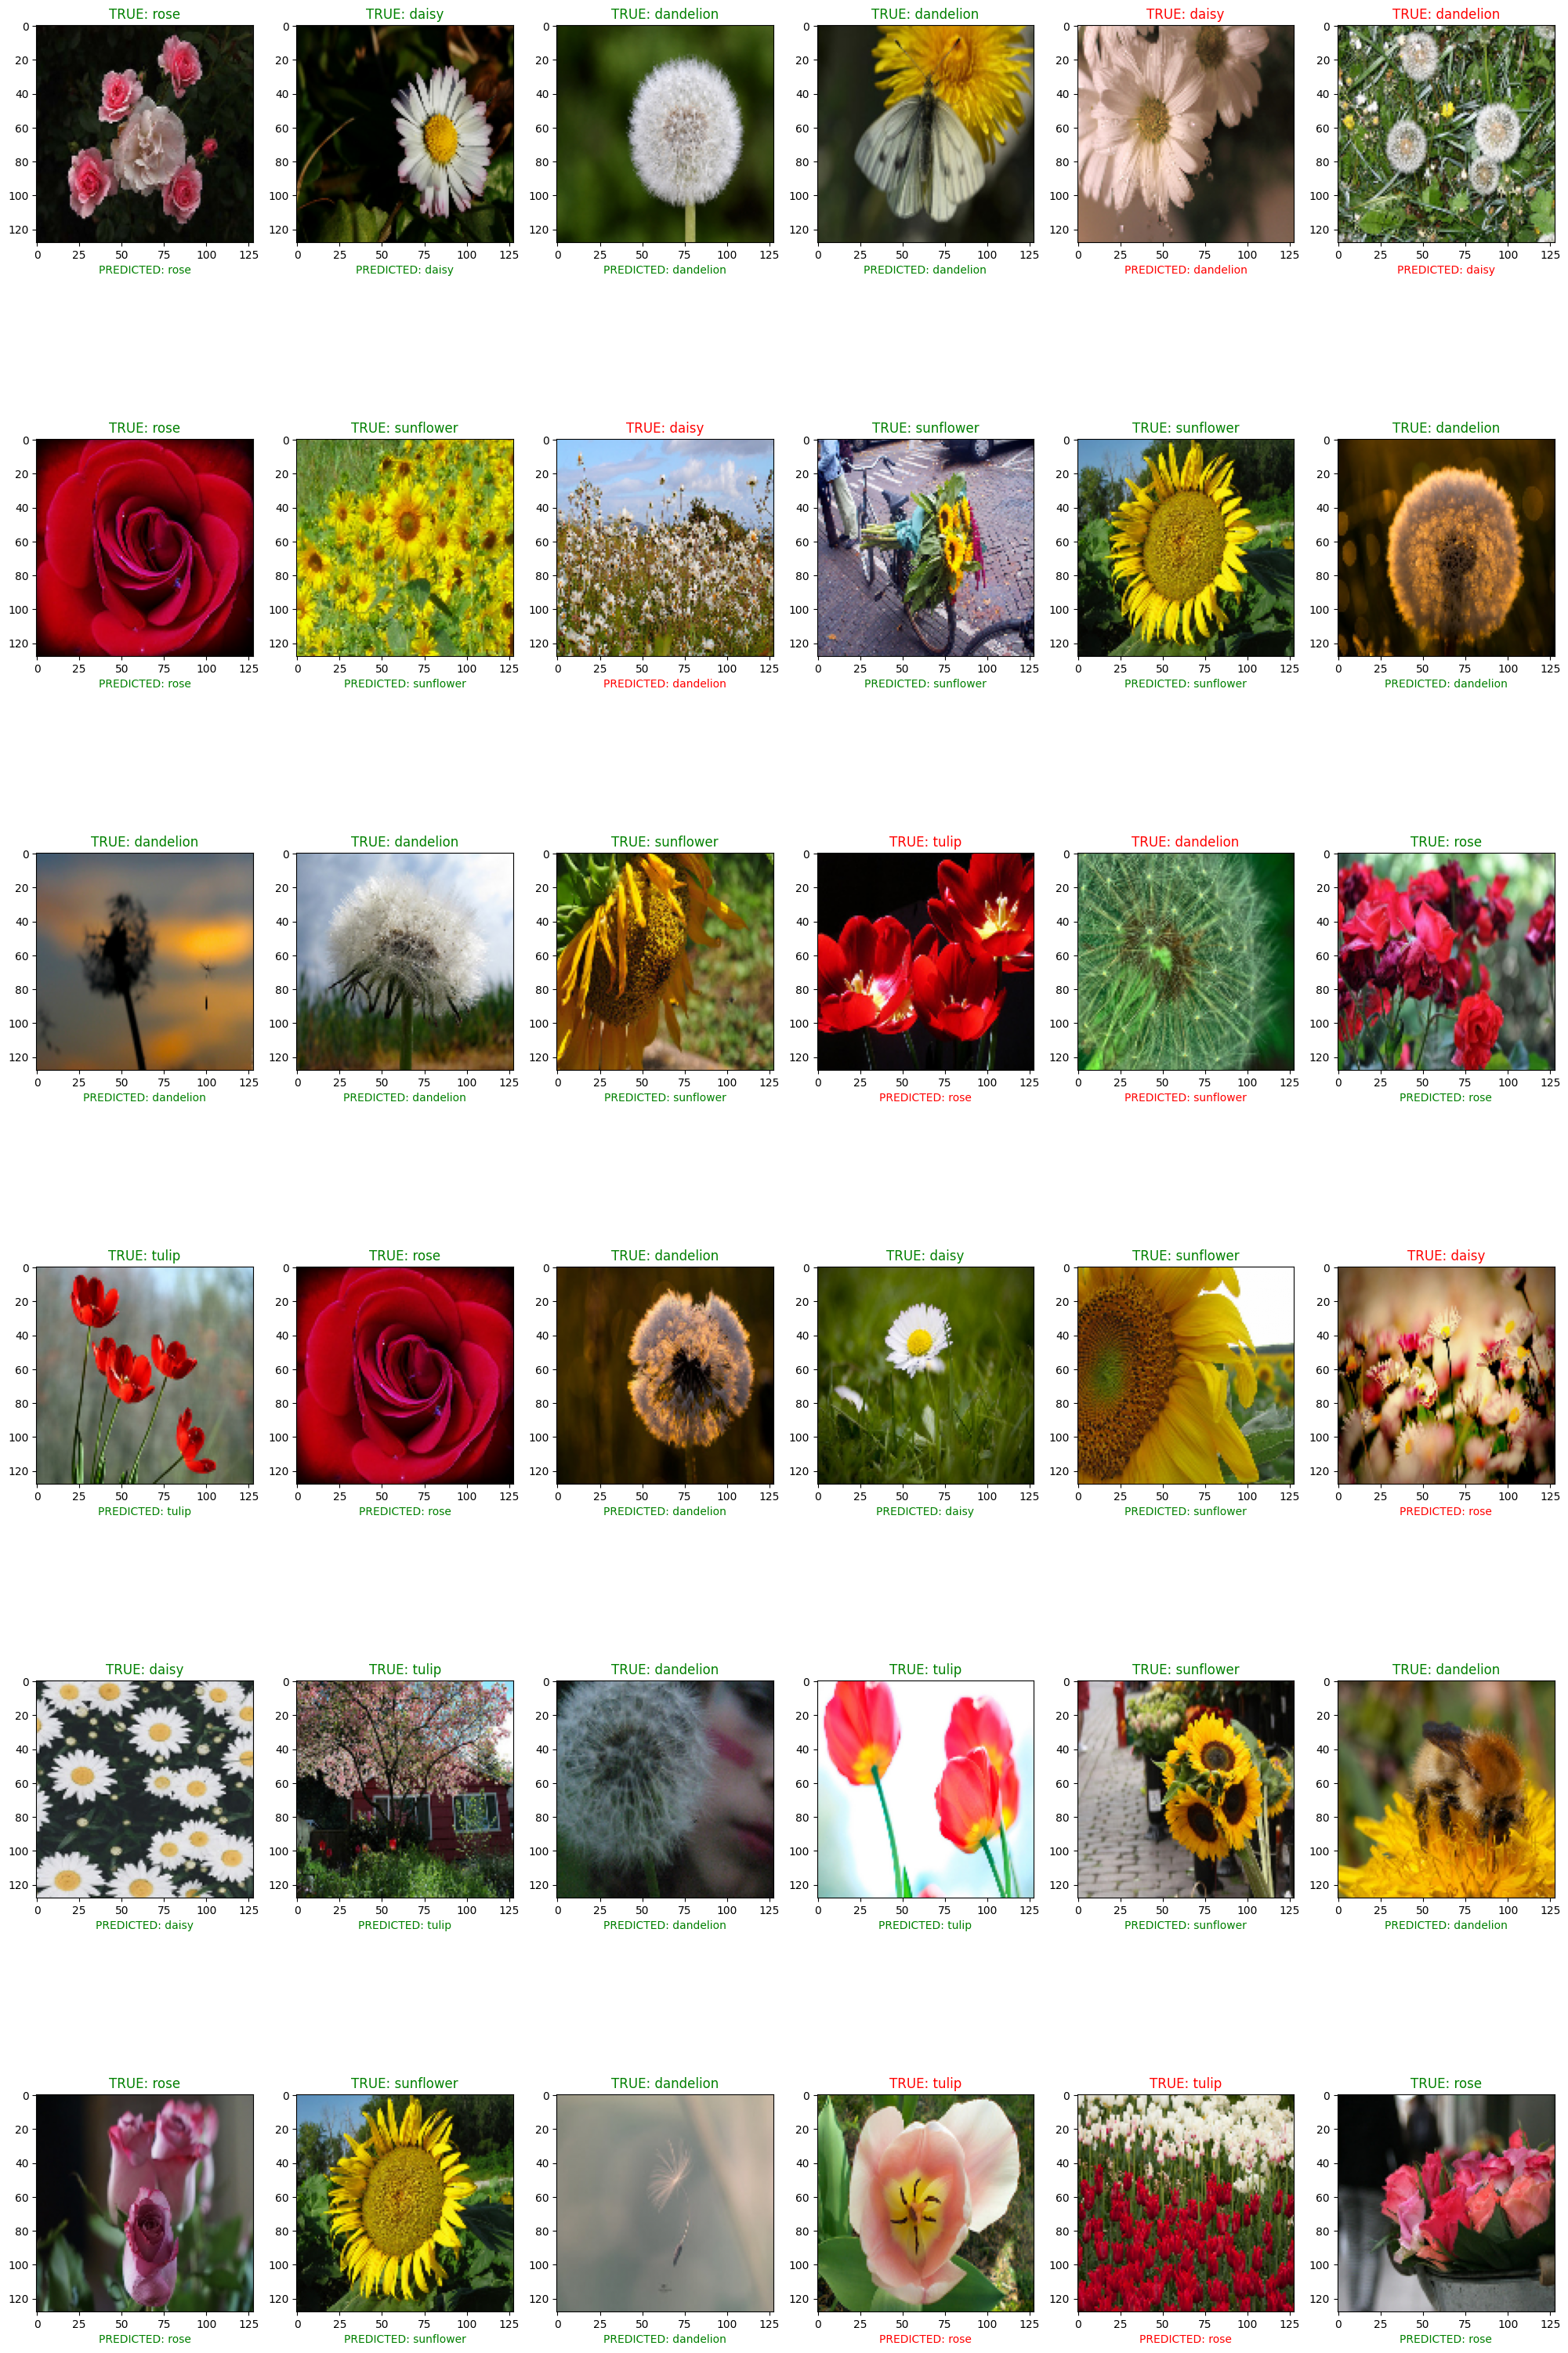

In [12]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(Y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(Y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(Y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

In [14]:
import tensorflow as tf
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS** using the GPU


In [15]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1
